In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from statistics import mean 
from sklearn.model_selection import cross_validate
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
data = pd.read_csv("ece-657a-w20-asg3-part-1/train.csv")
test = pd.read_csv("ece-657a-w20-asg3-part-1/testX.csv")

In [16]:
X = data.drop(columns=['Id','Label'])
y = data[['Label']]
testData = test.drop(columns= ['Id'])
ran = 42

In [17]:
from sklearn.preprocessing import StandardScaler
zScore=StandardScaler()
zScore.fit(X)
testData=zScore.transform(testData)
X=zScore.transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran)

In [19]:
# lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis().fit(X_train,y_train.values.ravel())
X_train_LDA=lda.transform(X_train)
X_test_LDA=lda.transform(X_test)

In [20]:
#pca
from sklearn.decomposition import PCA
pca=PCA(n_components=20).fit(X_train)
X_train_PCA=pca.transform(X_train)
X_test_PCA=pca.transform(X_test)

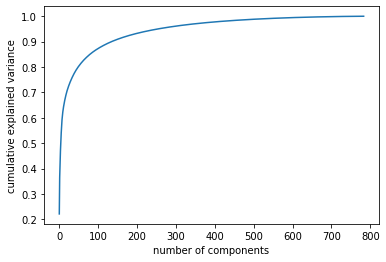

In [8]:
pca1=PCA().fit(X_train)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

It shows that when number of components is about 400, the explained ratio is close to 100%.
But it is too time-consuming if I use 400, so I set n_components to 20 to test performance of the model and parameters.

In [9]:
clf = SVC(random_state=ran)
train_start = time.time()
clf.fit(X_train_LDA,y_train.values.ravel())
train_end = time.time()
test_start = time.time()
print(clf.score(X_test_LDA,y_test))
test_end = time.time()
print("svc lda")
print("train time:",train_end - train_start)
print("test time:", test_end - test_start )

0.7116666666666667
svc lda
train time: 32.027034282684326
test time: 7.77794075012207


In [10]:
clf = SVC(random_state=ran)
train_start = time.time()
clf.fit(X_train_PCA,y_train.values.ravel())
train_end = time.time()
test_start = time.time()
print(clf.score(X_test_PCA,y_test))
test_end = time.time()
print("svc pca")
print("train time:",train_end - train_start)
print("test time:", test_end - test_start )

0.8656666666666667
svc pca
train time: 86.44873213768005
test time: 10.762717008590698


lda is not so good as pca, so I use pca (n_components=20) as feature extraction method.
But it is more time-consuming compared to lda.

In [11]:

clf = DecisionTreeClassifier(random_state=42)
train_start = time.time()
clf.fit(X_train_PCA,y_train.values.ravel())
train_end = time.time()
test_start = time.time()
print(clf.score(X_test_PCA,y_test))
test_end = time.time()
print("decision tree pca")
print("train time:",train_end - train_start)
print("test time:", test_end - test_start )

0.81025
decision tree pca
train time: 2.2310023307800293
test time: 0.00547337532043457


In [12]:

clf = RandomForestClassifier(random_state=42)
train_start = time.time()
clf.fit(X_train_PCA,y_train.values.ravel())
train_end = time.time()
test_start = time.time()
print(clf.score(X_test_PCA,y_test))
test_end = time.time()
print("random forest pca")
print("train time:",train_end - train_start)
print("test time:", test_end - test_start )

0.87775
random forest pca
train time: 30.676518201828003
test time: 0.32579731941223145


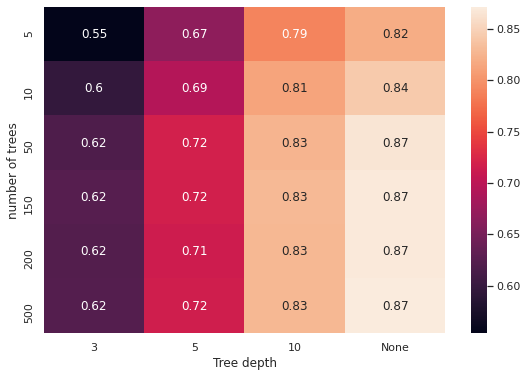

In [21]:
import seaborn as sns;sns.set()
depth=[3, 5, 10, None]
num_of_trees=[5, 10, 50, 150, 200, 500]
result=[]
for n in num_of_trees:
    result1 = []
    for d in depth:
        clf = RandomForestClassifier(max_depth=d,n_estimators=n, random_state=42)
        cv_results = cross_validate(clf, X_train_PCA/255, y_train.values.ravel(), cv=3)
        result1.append(mean(cv_results['test_score']))
    result.append(result1)
x_axis_labels = [3, 5, 10, 'None']
y_axis_labels=[5, 10, 50, 150, 200, 500]
f, ax = plt.subplots(figsize=(9, 6))
ax=sns.heatmap(result, xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True)
plt.xlabel("Tree depth")
plt.ylabel("number of trees")
plt.show()

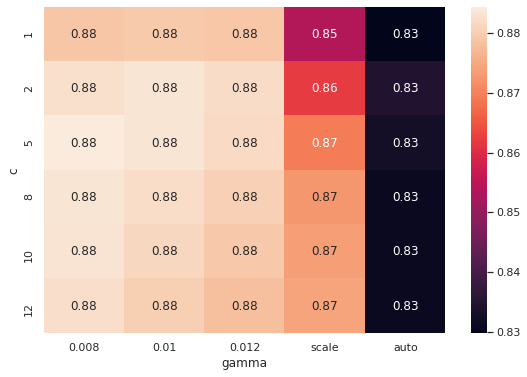

In [8]:
import seaborn as sns;sns.set()
C=[1, 2, 5, 8, 10, 12]
gamma=[0.008,0.01,0.012,'scale','auto']
result=[]
for c in C:
    result1 = []
    for g in gamma:
        clf = SVC(C=c,gamma=g, random_state=ran)
        cv_results = cross_validate(clf, X_train_PCA, y_train.values.ravel(), cv=3)
        result1.append(mean(cv_results['test_score']))
    result.append(result1)
x_axis_labels = [0.008,0.01,0.012,'scale','auto']
y_axis_labels=[1, 2, 5, 8, 10, 12]
f, ax = plt.subplots(figsize=(9, 6))
ax=sns.heatmap(result, xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True)
plt.xlabel("gamma")
plt.ylabel("c")
plt.show()

c=5 gamma=0.008

In [21]:
#final model
model = SVC(C=5,gamma=0.008, random_state=ran,probability=True)
model.fit(X_train_PCA, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.008, kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [25]:
print("basic score:"+str(model.score(X_test_PCA,y_test)))

basic score:0.8938333333333334


In [24]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.2, random_state = ran)
pca=PCA(n_components=20).fit(X_train)
X_test_PCA_new=pca.transform(X_test_new)
print("Evaluate your code with other metrics on the training data:"+str(model.score(X_test_PCA_new,y_test_new)))

Evaluate your code with other metrics on the training data:0.9463541666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


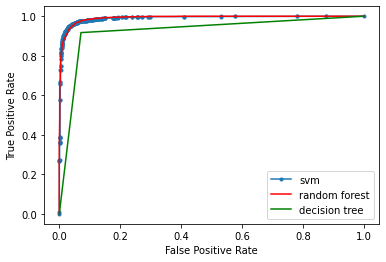

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#take two labels
data_2=data.loc[data['Label'].isin([0,1])]
X = data_2.drop(columns=['Id','Label'])
y = data_2[['Label']]
ran = 42
zScore=StandardScaler()
zScore.fit(X)
testData=zScore.transform(testData)
X=zScore.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran)
pca=PCA(n_components=20).fit(X_train)
X_train_PCA=pca.transform(X_train)
X_test_PCA=pca.transform(X_test)

model = SVC(C=5,gamma=0.008, random_state=ran,probability=True)
model.fit(X_train_PCA, y_train)
lr_probs = model.predict_proba(X_test_PCA)
lr_probs = lr_probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, lr_probs)
plt.plot(fpr, tpr, marker='.', label='svm')

model = RandomForestClassifier(random_state=42)
model.fit(X_train_PCA, y_train)
lr_probs = model.predict_proba(X_test_PCA)
lr_probs = lr_probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, lr_probs)
plt.plot(fpr, tpr, color = 'r', label='random forest')

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_PCA, y_train)
lr_probs = model.predict_proba(X_test_PCA)
lr_probs = lr_probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, lr_probs)
plt.plot(fpr, tpr, color = 'g', label='decision tree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

todo:
Evaluate your code with other metrics on the training data